In [67]:
%pip install numpy==2.0.0

Note: you may need to restart the kernel to use updated packages.


In [68]:
# === ETAPA 1: Importações ===
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [69]:
# === ETAPA 2: Carregamento e pré-processamento dos dados ===
paths = {
    "AAPL": "app/data/Historical_Data_APPL_1Y.csv",
    "GOOGL": "app/data/Historical_Data_GOOGL_1Y.csv",
    "IBM": "app/data/Historical_Data_IBM_1Y.csv",
    "MSFT": "app/data/Historical_Data_MSFT_1Y.csv"
}

In [70]:
# Ler e adicionar coluna de origem (empresa)
dataframes = []
for ticker, path in paths.items():
    df = pd.read_csv(path)
    df["Empresa"] = ticker
    dataframes.append(df)

# Mapeamento de empresas para valores numéricos
empresa_map = {"AAPL": 0, "GOOGL": 1, "IBM": 2, "MSFT": 3}

# Converter a coluna 'Empresa' para valores numéricos
for df in dataframes:
    df["Empresa"] = df["Empresa"].map(empresa_map)

# Concatenar todos os dados
merged_df = pd.concat(dataframes, ignore_index=True)

# Mostrar as primeiras linhas do dataframe combinado
merged_df.head(50)

,Date,Close/Last,Volume,Open,High,Low,Empresa
0,05/29/2025,$199.95,51477940,$203.575,$203.81,$198.51,0
1,05/28/2025,$200.42,45339680,$200.59,$202.73,$199.90,0
2,05/27/2025,$200.21,56288480,$198.30,$200.74,$197.43,0
3,05/23/2025,$195.27,78432920,$193.665,$197.70,$193.46,0
4,05/22/2025,$201.36,46742410,$200.71,$202.75,$199.70,0
5,05/21/2025,$202.09,59211770,$205.17,$207.04,$200.71,0
6,05/20/2025,$206.86,42496640,$207.67,$208.47,$205.03,0
7,05/19/2025,$208.78,46140530,$207.91,$209.48,$204.26,0
8,05/16/2025,$211.26,54737850,$212.36,$212.57,$209.77,0
9,05/15/2025,$211.45,45029470,$210.95,$212.96,$209.54,0


In [71]:
# LIMPEZA E PREPARAÇÃO DOS DADOS
merged_df.columns = merged_df.columns.str.replace(' ', '').str.replace('/', '_')  # Renomeiou-se para facilitar

cols_to_clean = ['Close_Last', 'Open', 'High', 'Low']
for col in cols_to_clean:
    merged_df[col] = merged_df[col].replace('[\\$,]', '', regex=True).astype(float)

# Volume já está em int, mas garanta isso se quiser
merged_df['Volume'] = merged_df['Volume'].astype(float)
merged_df['Empresa'] = merged_df['Empresa'].astype(int) 

# Verifique se tudo está numérico
print(merged_df.dtypes)

# Seleção de colunas relevantes (exemplo)
features = merged_df[['Open', 'High', 'Low', 'Close_Last', 'Volume','Empresa']].copy()
# Adicionar coluna de data como índice
#features['Date'] = pd.to_datetime(merged_df['Date'])
# Definir a coluna 'Date' como índice
#features.set_index('Date', inplace=True)

# Remover linhas com valores ausentes
features = features.dropna()

z_scores = np.abs(zscore(features))
features = features[(z_scores < 3).all(axis=1)]

# Normalização dos dados
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)


# Função para criar janelas de sequência temporal
def create_sequences(data, seq_len):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        x = data[i:i+seq_len]
        y = data[i+seq_len][3]  # Posição 3 = 'Close'
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Criação das sequências
seq_len = 30
X, y = create_sequences(scaled_data, seq_len)

# Divisão dos dados
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, y_train = X[:train_size], y[:train_size]

X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]

X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

Date           object
Close_Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
Empresa         int64
dtype: object


In [72]:
# Verificação das dimensões dos conjuntos
merged_df.head(), merged_df.tail(), X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

(         Date  Close_Last      Volume     Open    High     Low  Empresa
 0  05/29/2025      199.95  51477940.0  203.575  203.81  198.51        0
 1  05/28/2025      200.42  45339680.0  200.590  202.73  199.90        0
 2  05/27/2025      200.21  56288480.0  198.300  200.74  197.43        0
 3  05/23/2025      195.27  78432920.0  193.665  197.70  193.46        0
 4  05/22/2025      201.36  46742410.0  200.710  202.75  199.70        0,
             Date  Close_Last      Volume     Open    High       Low  Empresa
 999   06/04/2024      416.07  14348920.0  412.430  416.44  409.6750        3
 1000  06/03/2024      413.52  17484680.0  415.525  416.43  408.9234        3
 1001  05/31/2024      415.13  47995250.0  416.750  416.75  404.5100        3
 1002  05/30/2024      414.67  28424850.0  424.300  424.30  414.2400        3
 1003  05/29/2024      429.17  15517130.0  425.690  430.94  425.6900        3,
 (673, 30, 6),
 (673,),
 (144, 30, 6),
 (144,),
 (145, 30, 6),
 (145,))

In [73]:
# === ETAPA 3: Dataset e DataLoader ===
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 32
train_loader = DataLoader(StockDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(StockDataset(X_val, y_val), batch_size=batch_size)
test_loader = DataLoader(StockDataset(X_test, y_test), batch_size=batch_size)

In [74]:
# === ETAPA 4: Modelo Transformer ===
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, d_model=128, num_heads=8, num_layers=4, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        self.positional_encoding = nn.Parameter(torch.zeros(1, seq_len, d_model))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=num_heads, dim_feedforward=128,
            dropout=dropout, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_proj(x)
        x = x + self.positional_encoding[:, :x.size(1)] # Adiciona codificação posicional
        x = self.transformer_encoder(x)
        x = x[:, -1, :]  # usa o último token da sequência
        return self.regressor(x)

input_dim = X_train.shape[2]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TimeSeriesTransformer(input_dim=input_dim).to(device)

In [77]:
# === ETAPA 5: Treinamento ===
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

num_epochs = 50

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        output = model(xb).squeeze()
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    
    train_losses.append(train_loss / len(train_loader))

    # Validação
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            output = model(xb).squeeze()
            val_loss += criterion(output, yb).item() * xb.size(0)
    val_losses.append(val_loss / len(val_loader))
    
    # Atualização do scheduler
    if 'scheduler' in locals():
        scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

/Users/apple/Developer/transformer-para-predicao-de-precos-de-acoes-em-Big-Techs/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:933: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


Epoch 1/50 | Train Loss: 14.6105 | Val Loss: 22.3572
Epoch 2/50 | Train Loss: 3.4782 | Val Loss: 18.0464
Epoch 3/50 | Train Loss: 2.0729 | Val Loss: 9.4449
Epoch 4/50 | Train Loss: 0.4660 | Val Loss: 7.1449
Epoch 5/50 | Train Loss: 0.3692 | Val Loss: 7.8154
Epoch 6/50 | Train Loss: 0.3899 | Val Loss: 7.8333
Epoch 7/50 | Train Loss: 0.3073 | Val Loss: 6.2118
Epoch 8/50 | Train Loss: 0.3964 | Val Loss: 6.6997
Epoch 9/50 | Train Loss: 0.2890 | Val Loss: 5.7895
Epoch 10/50 | Train Loss: 0.3318 | Val Loss: 5.2911
Epoch 11/50 | Train Loss: 0.2911 | Val Loss: 6.6779
Epoch 12/50 | Train Loss: 0.3334 | Val Loss: 6.4549
Epoch 13/50 | Train Loss: 0.2983 | Val Loss: 5.9294
Epoch 14/50 | Train Loss: 0.3244 | Val Loss: 5.2727
Epoch 15/50 | Train Loss: 0.2722 | Val Loss: 6.3845
Epoch 16/50 | Train Loss: 0.2792 | Val Loss: 5.4472
Epoch 17/50 | Train Loss: 0.2768 | Val Loss: 5.1767
Epoch 18/50 | Train Loss: 0.2562 | Val Loss: 3.8927
Epoch 19/50 | Train Loss: 0.2964 | Val Loss: 5.6653
Epoch 20/50 | Trai

========================AVALIAÇÃO DO MODELO===========================

 Avaliação do Modelo:
➡️ MSE  (Erro Quadrático Médio):      0.1132
➡️ RMSE (Raiz do Erro Quadrático):   0.3365
➡️ MAE  (Erro Absoluto Médio):       0.3341
➡️ R²   (Coeficiente de Determinação): -47.0395


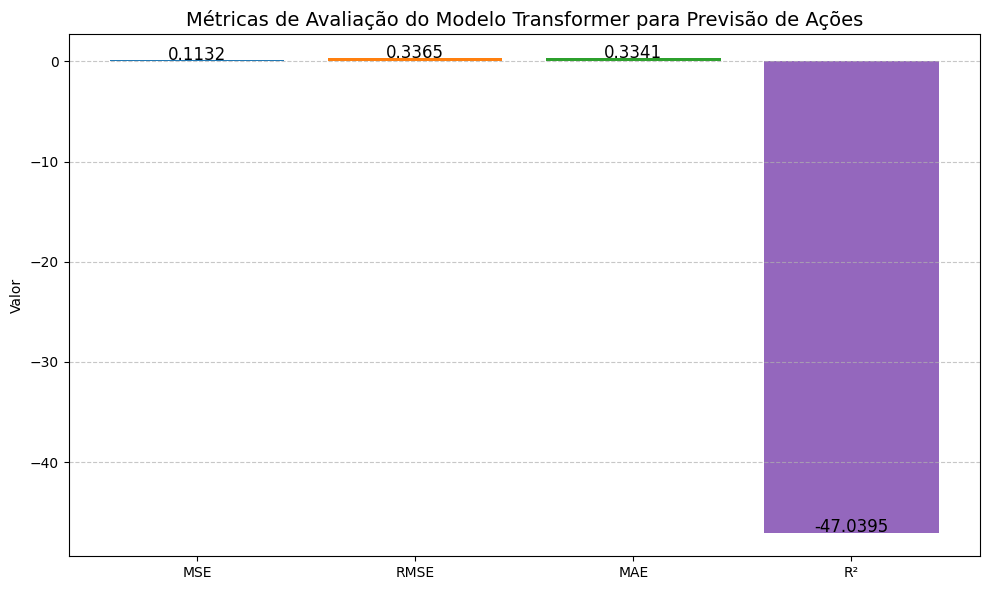

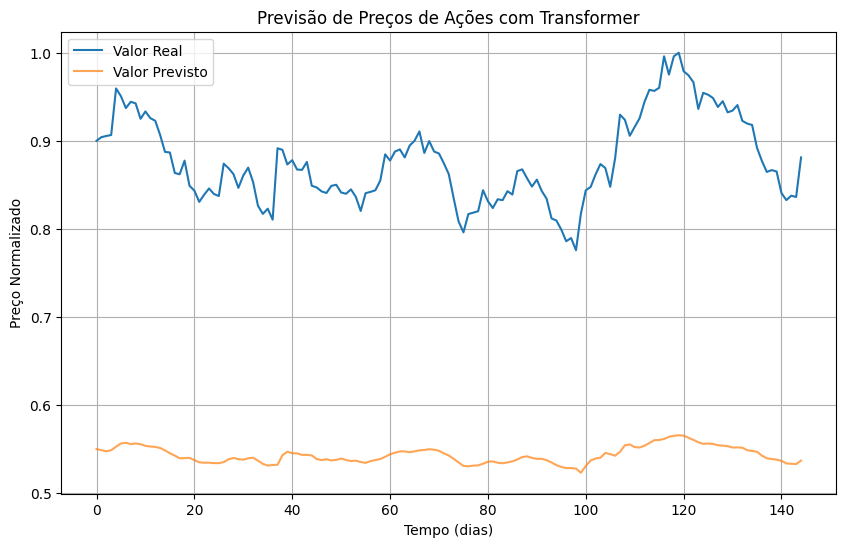

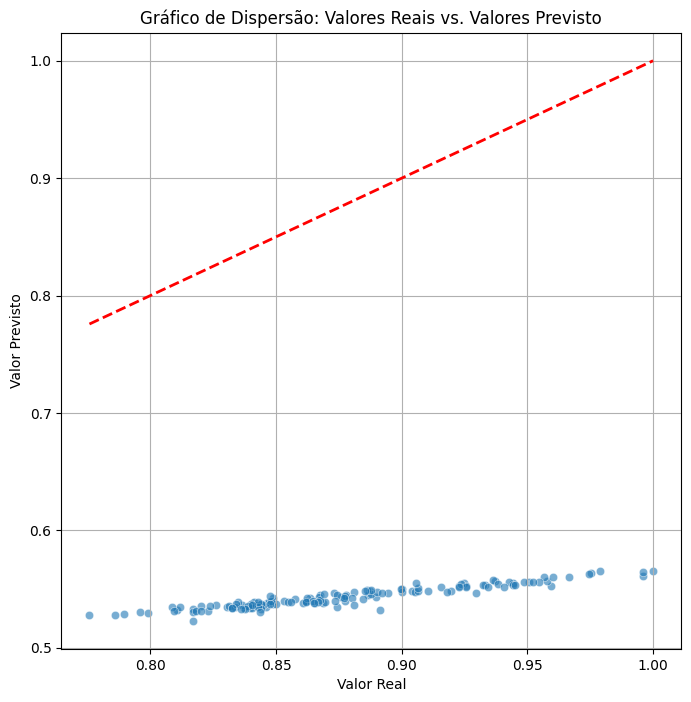

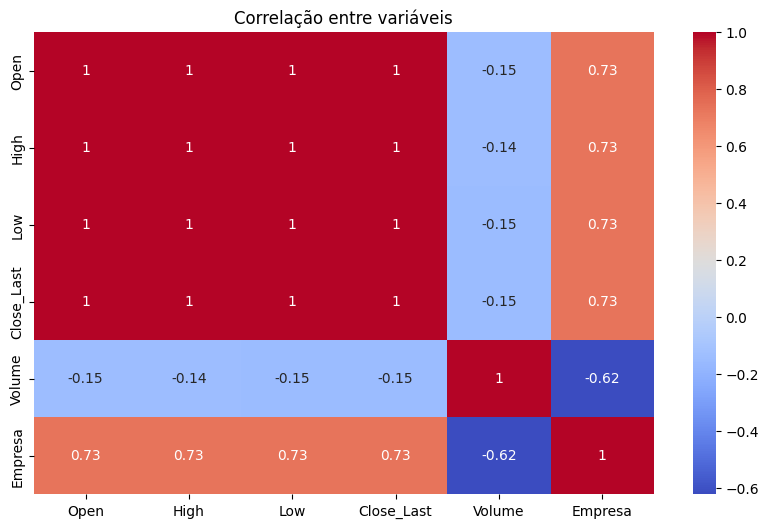

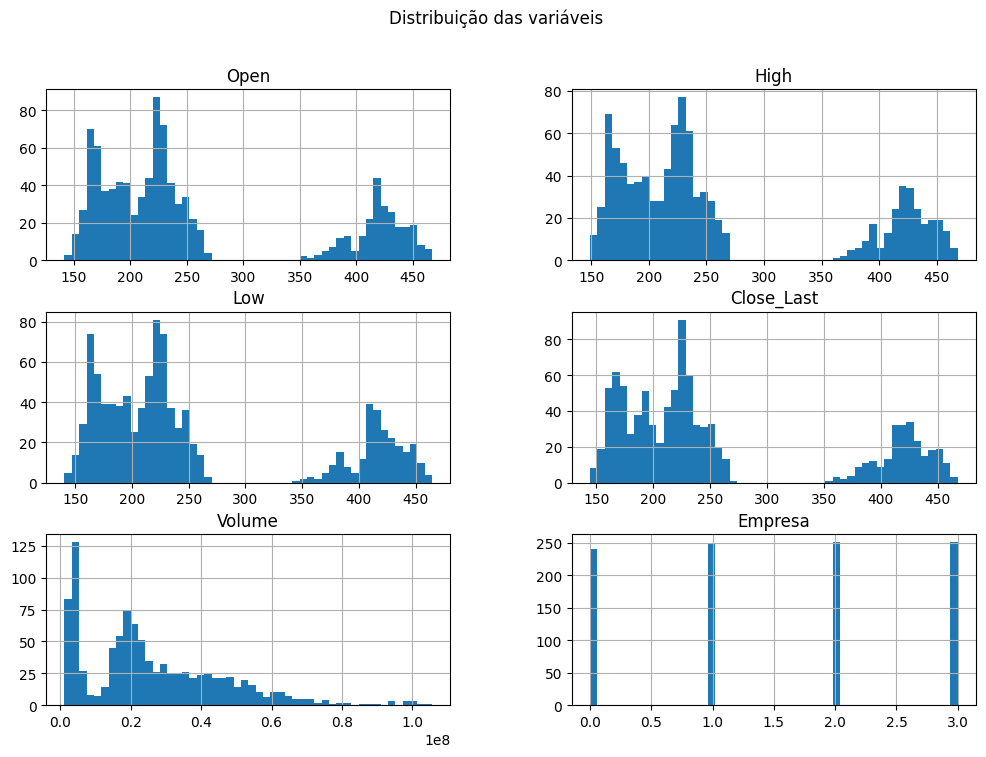

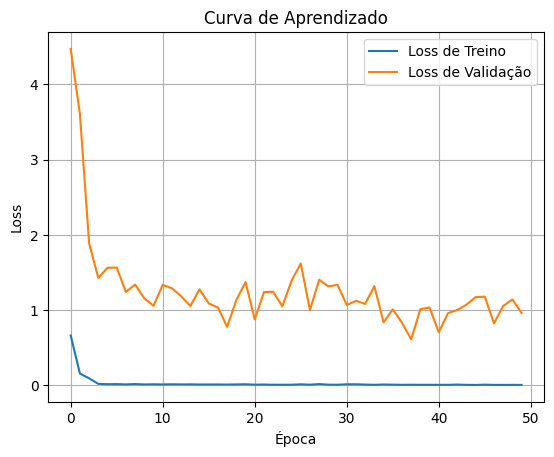

In [78]:
# Avaliação final
# === ETAPA 6: Avaliação ===
print("========================AVALIAÇÃO DO MODELO===========================")
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        yb = yb.to(device)
        out = model(xb).squeeze()
        y_true.extend(yb.detach().cpu().view(-1).tolist())
        y_pred.extend(out.detach().cpu().view(-1).tolist())



# Métricas
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)



# Mostrar métricas no console
print("\n Avaliação do Modelo:")
print(f"➡️ MSE  (Erro Quadrático Médio):      {mse:.4f}")
print(f"➡️ RMSE (Raiz do Erro Quadrático):   {rmse:.4f}")
print(f"➡️ MAE  (Erro Absoluto Médio):       {mae:.4f}")
print(f"➡️ R²   (Coeficiente de Determinação): {r2:.4f}")


#Gráfico de barras com as métricas
metrics = {
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "R²": r2
}


names = list(metrics.keys())
values = list(metrics.values())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

plt.figure(figsize=(10, 6))
bars = plt.bar(names, values, color=colors)
plt.title("Métricas de Avaliação do Modelo Transformer para Previsão de Ações", fontsize=14)
plt.ylabel("Valor")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# AdicionaR os valores numéricos acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


# Visualização
y_true = np.array(y_true)
y_pred = np.array(y_pred)

plt.figure(figsize=(10,6))
plt.plot(y_true, label='Valor Real')
plt.plot(y_pred, label='Valor Previsto', alpha=0.7)
plt.title("Previsão de Preços de Ações com Transformer")
plt.xlabel("Tempo (dias)")
plt.ylabel("Preço Normalizado")
plt.legend()
plt.grid(True)
plt.show()


# Gráfico de dispersão
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.title("Gráfico de Dispersão: Valores Reais vs. Valores Previsto")
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.grid(True)
plt.show()



# === ETAPA 7: Análise Exploratória dos Dados (EDA) ===
# Ver correlação
plt.figure(figsize=(10,6))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis')
plt.show()

# Ver distribuição das variáveis
features.hist(bins=50, figsize=(12, 8))
plt.suptitle('Distribuição das variáveis')
plt.show()



plt.plot(train_losses, label='Loss de Treino')
plt.plot(val_losses, label='Loss de Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Aprendizado')
plt.legend()
plt.grid(True)
plt.show()


